In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# set file path
file_path = "city_temperature.csv"
temp_df = pd.read_csv(file_path, low_memory=False)
#temp_df

In [3]:
# create copy df and drop column 'State'
temp_df = temp_df[["Country", "City", "Month", "Day", "Year", "AvgTemperature"]].copy()
#temp_df

In [4]:
temp_df["City"].nunique()

321

In [5]:
# check dataset for null values
temp_df.isnull().sum()

Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [6]:
# check data types
temp_df.dtypes

Country            object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [7]:
# remove average temperature values = -99
temp_df = temp_df[temp_df["AvgTemperature"] != -99]
temp_df["Year"].value_counts()

2001    115277
2005    114775
2004    114597
2003    114283
2006    114201
2000    114169
2010    113642
2002    113616
1999    113406
2007    113180
2009    112977
1997    112952
1996    112734
2008    112724
2011    112407
1995    112152
2012    111165
1998    111102
2013    110228
2014    107860
2015    106809
2017    106421
2016    106403
2018    105748
2019    105085
2020     38742
Name: Year, dtype: int64

In [8]:
# remove year 2020 due to incomplete yearly data
temp_df = temp_df[temp_df["Year"] != 2020]

In [9]:
# identify cities with incomplete datasets
cities = temp_df.groupby(["City"]).sum()
cities = cities[cities["Year"] < 40190]
#cities

In [10]:
# remove cities with incomplete datasets
temp_df = temp_df[(temp_df["City"] != "Athens") &
                  (temp_df["City"] != "Bangkok") &
                  (temp_df["City"] != "Baton Rouge") &
                  (temp_df["City"] != "Bissau") &
                  (temp_df["City"] != "Bonn") &
                  (temp_df["City"] != "Bujumbura") &
                  (temp_df["City"] != "Calgary") &
                  (temp_df["City"] != "Daytona Beach") &
                  (temp_df["City"] != "Dhaka") &
                  (temp_df["City"] != "Flagstaff") &
                  (temp_df["City"] != "Freetown") &
                  (temp_df["City"] != "Georgetown") &
                  (temp_df["City"] != "Halifax") &
                  (temp_df["City"] != "Hamburg") &
                  (temp_df["City"] != "Hamilton") &
                  (temp_df["City"] != "Harrisburg") &
                  (temp_df["City"] != "Lilongwe") &
                  (temp_df["City"] != "Lusaka") &
                  (temp_df["City"] != "Montreal") &
                  (temp_df["City"] != "Muscat") &
                  (temp_df["City"] != "Nicosia") &
                  (temp_df["City"] != "Ottawa") &
                  (temp_df["City"] != "Pristina") &
                  (temp_df["City"] != "Quito") &
                  (temp_df["City"] != "San Juan Puerto Rico") &
                  (temp_df["City"] != "Tbilisi") &
                  (temp_df["City"] != "Tel Aviv") &
                  (temp_df["City"] != "Toronto") &
                  (temp_df["City"] != "Vancouver") &
                  (temp_df["City"] != "Wilmington") &
                  (temp_df["City"] != "Winnipeg") &
                  (temp_df["City"] != "Yerevan") &
                  (temp_df["City"] != "Yuma")]

In [11]:
# number of unique cities
temp_df.nunique()

Country            110
City               288
Month               12
Day                 31
Year                25
AvgTemperature    1514
dtype: int64

In [12]:
# group by temperature
temp_df = temp_df.drop(columns=["Day"])
temp_df = temp_df.groupby(["Country", "City", "Year", "Month"], sort=False).mean()
temp_df = temp_df.reset_index()
#temp_df

In [13]:
# summary statistics
temp_stats = temp_df["AvgTemperature"].describe()

In [14]:
# calculate lower and upper bounds for outliers
temp_IQR = temp_stats["75%"] - temp_stats["25%"]
lower_bound = temp_stats["25%"] - 1.5*temp_IQR
upper_bound = temp_stats["75%"] + 1.5*temp_IQR
#print(lower_bound, upper_bound)

In [15]:
# determine number of lower bound outliers
lower_bound_outliers = temp_df[temp_df["AvgTemperature"] < lower_bound]
#lower_bound_outliers

In [16]:
# show cities that fall below lower bound
lower_bound_outliers["City"].unique()

array(['Shenyang', 'Ulan-bator', 'Moscow', 'Edmonton', 'Quebec', 'Regina',
       'Anchorage', 'Fairbanks', 'Caribou', 'Sault Ste Marie', 'Duluth',
       'Great Falls', 'Helena', 'Bismarck', 'Fargo'], dtype=object)

In [17]:
# determine number of upper bound outliers
upper_bound_outliers = temp_df[temp_df["AvgTemperature"] > upper_bound]
#upper_bound_outliers

In [18]:
# save the file
output_file = "clean_temp_df.csv"
temp_df.to_csv(output_file)

In [19]:
# set file path
file_path = "owid-co2-data.csv"
co2_df = pd.read_csv(file_path, low_memory=False)
#co2_df.head()

In [20]:
# create copy of df
co2_df = co2_df[['country','year','population', 'co2']].copy()
#co2_df.head()

In [21]:
# replace country names to align with 'city_temperature' dataset
co2_df['country'] = co2_df['country'].replace(['United States','Serbia','Netherlands'], ['US','Serbia-Montenegro','The Netherlands'])
#co2_df

In [22]:
# remove values for years before 1995 and year 2020
co2_df = co2_df[(co2_df["year"] > 1994) &
               (co2_df["year"] != 2020)]
#co2_df

In [23]:
# rename columns consistent with 'city_temperature' dataset
co2_df.rename(columns={'country': "Country",'year':'Year'}, inplace=True)
#co2_df

In [24]:
# convert co2 emissions to yearly
main_df = pd.merge(co2_df,temp_df, on=['Country','Year'])
main_df['co2']=main_df['co2'].apply(lambda x: x*.0833)
#main_df

In [25]:
main_df["City"].value_counts()

Little Rock    300
New Orleans    300
Detroit        300
Boston         300
Baltimore      300
              ... 
Lima           251
Edmonton       244
Lagos          243
Nairobi        239
Frankfurt      127
Name: City, Length: 282, dtype: int64

In [26]:
main_df['DATE'] = pd.to_datetime(main_df[['Year', 'Month']].assign(DAY=1))
main_df

,Country,Year,population,co2,City,Month,AvgTemperature,DATE
0,Albania,1997,3099747.0,0.127616,Tirana,4,58.340000,1997-04-01
1,Albania,1997,3099747.0,0.127616,Tirana,5,67.233333,1997-05-01
2,Albania,1997,3099747.0,0.127616,Tirana,6,77.366667,1997-06-01
3,Albania,1997,3099747.0,0.127616,Tirana,7,80.811111,1997-07-01
4,Albania,1998,3110699.0,0.145275,Tirana,2,47.800000,1998-02-01
...,...,...,...,...,...,...,...,...
83790,Vietnam,2019,96462108.0,21.683990,Hanoi,8,84.680645,2019-08-01
83791,Vietnam,2019,96462108.0,21.683990,Hanoi,9,83.300000,2019-09-01
83792,Vietnam,2019,96462108.0,21.683990,Hanoi,10,78.451613,2019-10-01
83793,Vietnam,2019,96462108.0,21.683990,Hanoi,11,72.960000,2019-11-01


In [27]:
# calculate yearly averages
temp_df2 = temp_df.groupby(['Country','City','Year'],sort=False).mean()
temp_df2 = temp_df2.reset_index()

main_year = pd.merge(co2_df,temp_df2, on=['Country','Year'])
main_year = main_year.drop(columns=['Month'])

#main_year

In [28]:
# create list to iterate
df_list2 = [d for _, d in main_year.groupby(['City'])]
df_list2[0]

,Country,Year,population,co2,City,AvgTemperature
3354,US,1995,265163740.0,5421.502,Abilene,63.323867
3501,US,1996,268335007.0,5610.582,Abilene,63.757908
3648,US,1997,271713634.0,5686.465,Abilene,62.470697
3795,US,1998,275175309.0,5731.050,Abilene,66.288621
3942,US,1999,278548148.0,5804.669,Abilene,65.956385
4089,US,2000,281710914.0,6010.508,Abilene,66.062195
4236,US,2001,284607992.0,5904.882,Abilene,64.407984
4383,US,2002,287279312.0,5946.771,Abilene,63.198932
4530,US,2003,289815567.0,6011.837,Abilene,64.224388
4677,US,2004,292354663.0,6114.007,Abilene,63.162758


In [29]:
# iterate through list to display yearly visualization
#for df in df_list2:
    #fig,ax=plt.subplots()
    #ax.plot(df.Year,df.co2,color='red')
    #Title=df.iloc[1,4]
    #plt.title(Title)
    #ax.set_xlabel('Date',fontsize=14)
    #ax.set_ylabel('CO2 Emission',color='red',fontsize=14)
    #ax2=ax.twinx()
    #ax2.plot(df.Year,df.AvgTemperature,color='steelblue')
    #ax2.set_ylabel('Average Temp',color='steelblue',fontsize=14)

In [30]:
# check dataset for null values
main_year.isnull().sum()

Country           0
Year              0
population        0
co2               0
City              0
AvgTemperature    0
dtype: int64

In [31]:
# summary statistics for all cities/countries prior to grouping
co2_stats = main_year["co2"].describe()
#co2_stats

In [32]:
# calculate lower and upper bounds for outliers
temp_IQR = co2_stats["75%"] - co2_stats["25%"]
lower_bound = co2_stats["25%"] - 1.5*temp_IQR
upper_bound = co2_stats["75%"] + 1.5*temp_IQR
#print(lower_bound, upper_bound)

In [33]:
# determine number of lower bound outliers
lower_bound_outliers = main_year[main_year["co2"] < lower_bound]
#lower_bound_outliers

In [34]:
# determine number of upper bound outliers
upper_bound_outliers = main_year[main_year["co2"] > upper_bound]
#upper_bound_outliers

In [35]:
# save the file
output_file = "merged_df.csv"
main_year.to_csv(output_file)

In [36]:
# predict Co2 based on year
from sklearn.model_selection import train_test_split
import datetime as dt
Citylist=[]
Coeflist=[]
Interceptlist=[]
Scorelist=[]
for df in df_list2:
    y=df['co2'].values
    X=df['Year'].values.reshape(-1,1)
    X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = .7,random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    Scorelist.append(model.score(X_train,y_train))
    
    Citylist.append(df.iloc[1,4])
    Coeflist.append(model.coef_)
    Interceptlist.append(model.intercept_)
Eqdf=pd.DataFrame({'City':Citylist,'Coef':Coeflist,"Intercept":Interceptlist,"Model Score":Scorelist})
#Eqdf

In [37]:
# predict temperature based on year
Citylist2=[]
Coeflist2=[]
Interceptlist2=[]
Scorelist2=[]
for df in df_list2:
    y=df['AvgTemperature'].values
    X=df['Year'].values.reshape(-1,1)
    X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = .7,random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    Scorelist2.append(model.score(X_train,y_train))
    
    Citylist2.append(df.iloc[1,4])
    Coeflist2.append(model.coef_)
    Interceptlist2.append(model.intercept_)
Eqdf2=pd.DataFrame({'City':Citylist2,'Coef':Coeflist2,"Intercept":Interceptlist2,"Model Score":Scorelist2})
#Eqdf2

In [38]:
# predict average temperature based on Co2
Citylist3=[]
Coeflist3=[]
Interceptlist3=[]
Scorelist3=[]
for df in df_list2:
    y=df['AvgTemperature'].values
    X=df['co2'].values.reshape(-1,1)
    X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = .7,random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    Scorelist3.append(model.score(X_train,y_train))
    
    Citylist3.append(df.iloc[1,4])
    Coeflist3.append(model.coef_)
    Interceptlist3.append(model.intercept_)
Eqdf3=pd.DataFrame({'City':Citylist3,'Coef':Coeflist3,"Intercept":Interceptlist3,"Model Score":Scorelist3})
#Eqdf3

Choose City:Zurich
Year:2050
Predicted average temperature in 2050 is 
[51.4384852]


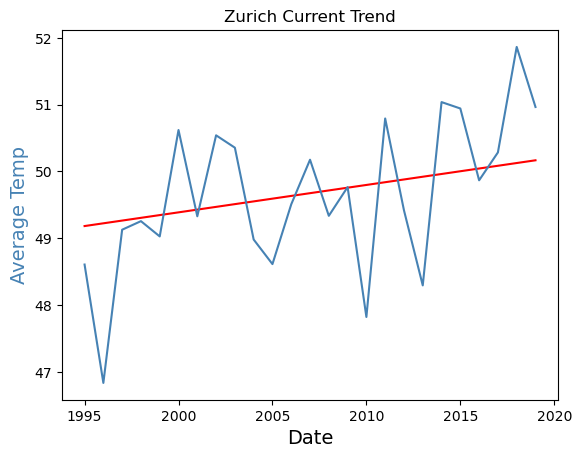

In [39]:
# temperature Estimator
while True:             # Loop continuously
    TargetCity = input('Choose City:')
    TargetYear= input('Year:')
    if (Eqdf2['City'] == TargetCity).any():
        Tempdf=Eqdf2.loc[Eqdf2['City'] == TargetCity]
        Temperature=Tempdf.iloc[0]['Coef']*int(TargetYear)+Tempdf.iloc[0]['Intercept']
        B= Eqdf2.index[Eqdf2['City']==TargetCity].tolist()
        A=B[0]
        formula=Tempdf.iloc[0]['Coef']*df_list2[A].Year+Tempdf.iloc[0]['Intercept']
        #Z=A[0]
        print("Predicted average temperature in " + TargetYear + " is ")
        print(Temperature)
        fig,ax=plt.subplots()
        ax.plot(df_list2[A].Year,formula,color='red')
        Title=df_list2[A].iloc[1,4]
        plt.title(Title + " " + "Current Trend")
        ax.set_xlabel('Date',fontsize=14)
        ax.set_ylabel('Temperature Trend',color='red',fontsize=14)
        #ax2=ax.twinx()
        ax.plot(df_list2[A].Year,df_list2[A].AvgTemperature,color='steelblue')
        ax.set_ylabel('Average Temp',color='steelblue',fontsize=14)
        break

In [40]:
filter1df = Eqdf2[Eqdf2['Coef']<1]
filter2df = filter1df[filter1df['Coef']>-1]
Sorteddf = filter2df.sort_values(by=['Coef'],ascending=False)
#Sorteddf

In [41]:
# show top five
#Sorteddf.head()

In [42]:
# show last five
#Sorteddf.tail()